## Visualization

In [45]:
df.show(5)

+--------------------+-----------+-----+---------+-----------+----------+--------------------+----------------+------+
|            Airlines|Total_Stops|Price| Duration|Destination|      Date|       Airlines_list|Pays_Destination|Depart|
+--------------------+-----------+-----+---------+-----------+----------+--------------------+----------------+------+
|Tunisair, Air Alg...|          1|  238|10.666667|      Alger|2025-06-29|[Tunisair, Air Al...|         Algerie| Tunis|
|    Transavia France|          0|   55|2.5833333|      Paris|2025-07-09|  [Transavia France]|          France| Tunis|
|         ITA Airways|          1|  178|4.8166666|     Madrid|2025-05-30|       [ITA Airways]|         Espagne| Tunis|
|           Lufthansa|          3|  652|17.833334|    Abidjan|2025-05-30|         [Lufthansa]|   Cote d'Ivoire| Tunis|
|    Turkish Airlines|          2|  438|    26.25|  N'Djamena|2025-04-10|  [Turkish Airlines]|           Tchad| Tunis|
+--------------------+-----------+-----+--------

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [47]:
# Convert a Dataframe to Pandas for visualization.
df_pandas = df.toPandas()


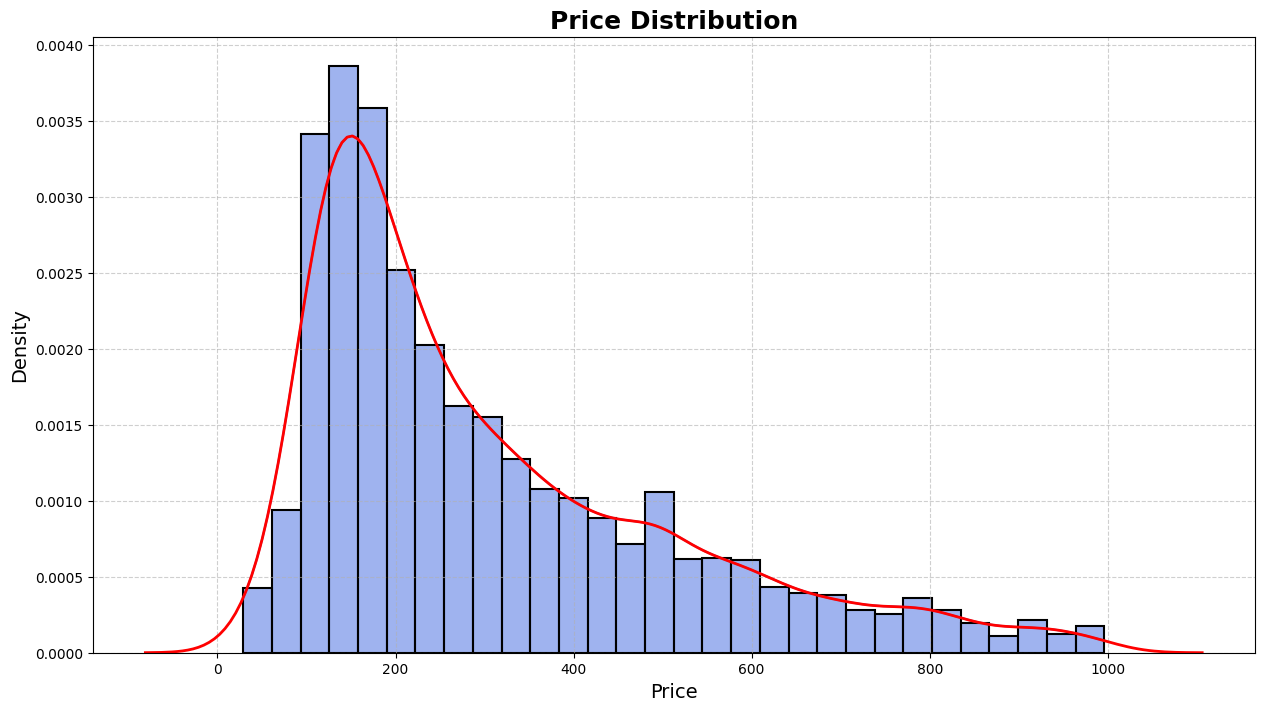

In [48]:
"""
This code visualizes the distribution of data in the Price column. The histogram shows the frequency of different value ranges, while the KDE curve offers a smoother estimate of the underlying data distribution. This helps to understand the distribution, central tendencies and variability of prices in the dataset.
"""

plt.figure(figsize=(15, 8))

sns.histplot(df_pandas['Price'], bins=30, kde=True, color='royalblue', stat='density', linewidth=1.5)


plt.title('Price Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

sns.kdeplot(df_pandas['Price'], color='red', linewidth=2)



plt.show()


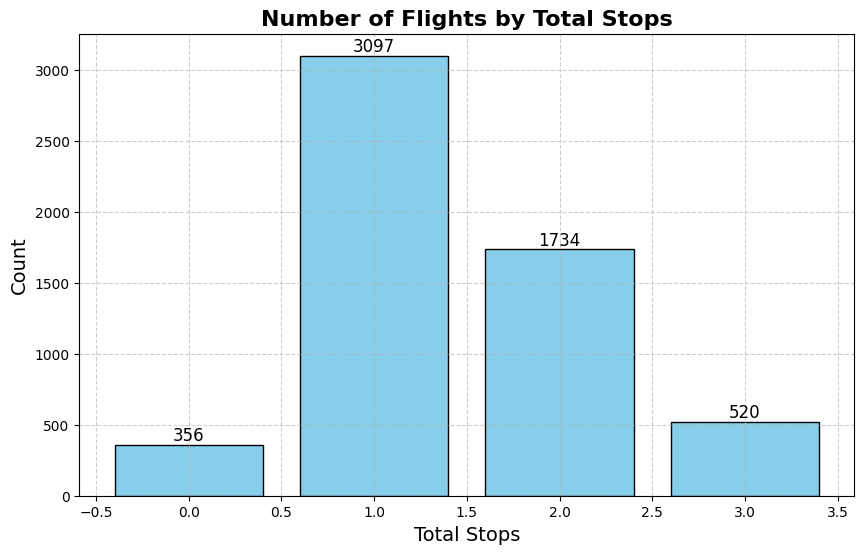

In [49]:
"""
This code shows the distribution of flights according to the number of stops. Each bar represents a stop category (e.g. non-stop, 1 stop), and the height of the bar indicates the total number of flights in that category. Annotations on the bars make the breakdowns easier to read.
"""
stop_counts=df_pandas['Total_Stops'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_palette("Blues")


bars = plt.bar(stop_counts.index, stop_counts.values, color='skyblue', edgecolor='black')

for i,bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+2,str(height),ha='center',va='bottom',fontsize=12,color='black')

plt.title('Number of Flights by Total Stops', fontsize=16, fontweight='bold')
plt.xlabel('Total Stops', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

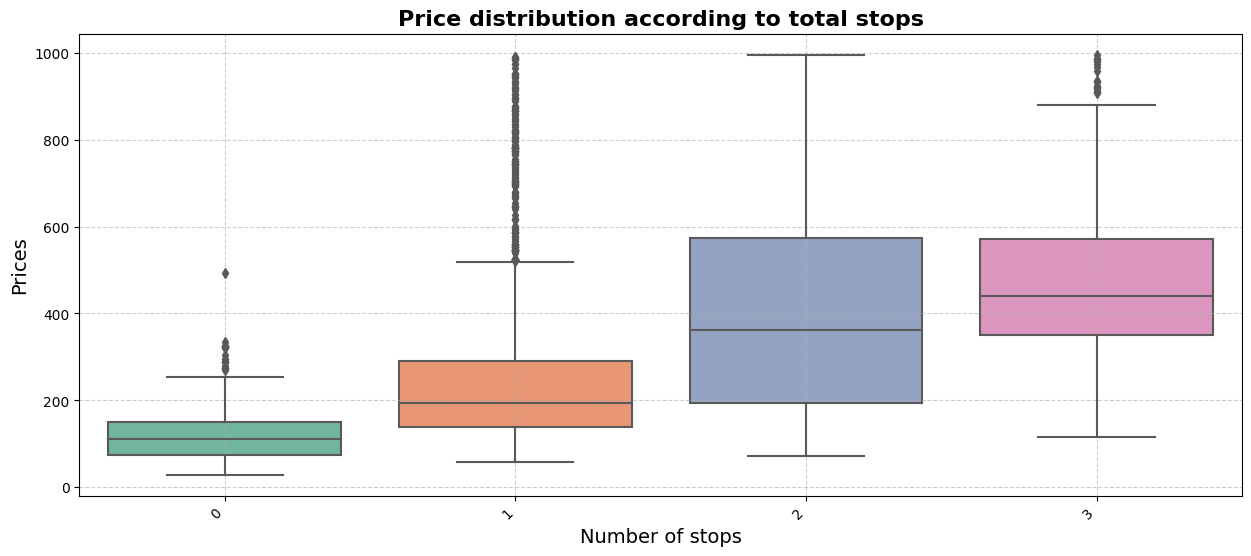

In [50]:
"""
This code helps you understand how ticket prices vary according to the number of stops (e.g. non-stop, 1-stop, etc.). Each box represents a category of stops and highlights price trends, such as:

Minimum, median and maximum prices for each category.
Price dispersion (indicated by box size and whiskers).
Any outliers, which appear as dots outside the whiskers.
This is useful for analyzing whether a greater number of stops is associated with lower prices, or whether prices vary widely within a category.


"""
plt.figure(figsize=(15, 6))

sns.set_palette("Set2")

sns.boxplot(x='Total_Stops', y='Price', data=df_pandas, linewidth=1.5)


plt.title('Price distribution according to total stops', fontsize=16, fontweight='bold')


plt.xlabel('Number of stops', fontsize=14)
plt.ylabel('Prices', fontsize=14)


plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

So generally speaking, as the number of stops increases, so does the price, but this is generally due to the distance travelled and the resources required.

In [51]:
df_pandas["Airlines_list"]

0                      [Tunisair, Air Algerie]
1                           [Transavia France]
2                                [ITA Airways]
3                                  [Lufthansa]
4                           [Turkish Airlines]
                         ...                  
5702                        [Turkish Airlines]
5703                    [Plusieurs compagnies]
5704              [Tunisair, Transavia France]
5705                   [Tunisair, Air Algerie]
5706    [Royal Air Maroc, Mauritania Airlines]
Name: Airlines_list, Length: 5707, dtype: object

In [ ]:
from collections import Counter


def expand_airlines(airlines_list):
    airline_counts = Counter()
    
    for airline_group in airlines_list:
        if ("," in airline_group):
            temp=airline_group.split(", ")
            for i in temp:
                airline_counts[i] += 1
        else:
            airline_counts[airline_group[0]] += 1


    
    return dict(sorted(airline_counts.items(), key=lambda x: x[1], reverse=True))

# Calcul des occurrences
airlines = expand_airlines(df_pandas['Airlines_list'])

# Création du graphique
plt.figure(figsize=(12, 50))
sns.barplot(x=list(airlines.values()), 
            y=list(airlines.keys()), 
            palette='viridis')

plt.title('Flight Distribution by Airlines', fontsize=15)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Airlines', fontsize=12)


for i, (airline, count) in enumerate(airlines.items()):
    plt.text(count, i, f' {count}', va='center')

plt.tight_layout()
plt.show()


dict_keys(['Tunisair', 'Plusieurs compagnies', 'Nouvelair', 'Air France', 'Transavia France', 'ITA Airways', 'Lufthansa', 'Turkish Airlines', 'Royal Air Maroc', 'Air Algerie', 'Egyptair', 'Tunisair Express', 'Vueling', 'Aegean Airlines', 'KLM', 'Air Europa', 'Eurowings', 'Qatar Airways', 'Aeroitalia', 'Emirates', 'Royal Jordanian'])


Here we have listed the agencies irrespective of whether they are used for stopovers or not.Tunisair is a principal airline 

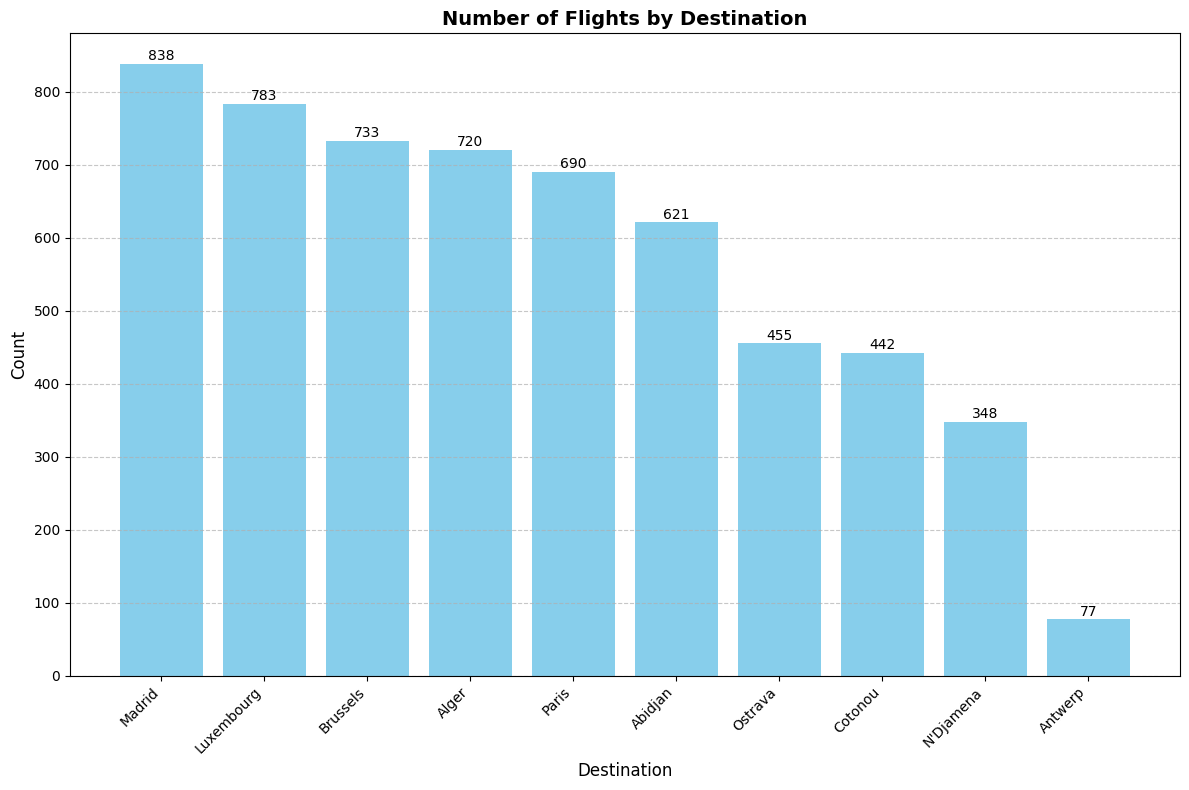

In [53]:
# Nombre de vols par destination
d_2 = df_pandas['Destination'].value_counts().to_dict()
destinations = list(d_2.keys())
values = list(d_2.values())


plt.figure(figsize=(12, 8))  
bars = plt.bar(destinations, values, color='skyblue')


for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  
             str(value), ha='center', va='bottom', fontsize=10)

plt.title('Number of Flights by Destination', fontsize=14, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout() 
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Affichage
plt.show()


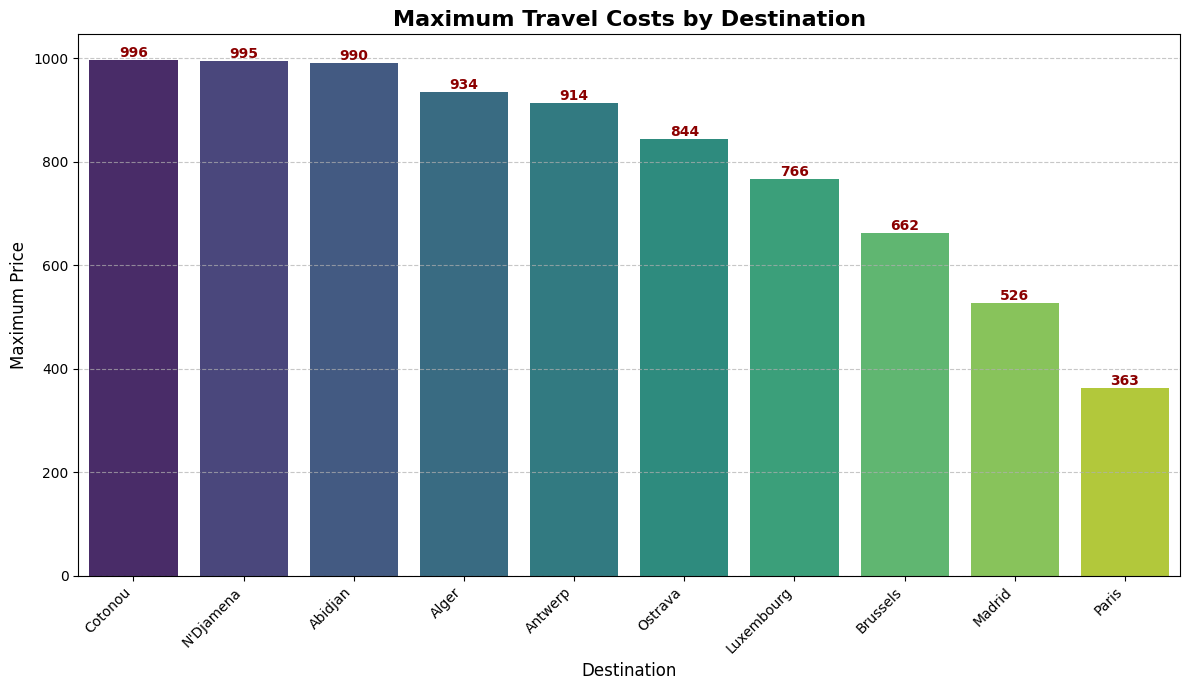

In [54]:

# Max price by destination
def get_max_prices(df):
    return df.groupby('Destination')['Price'].max().sort_values(ascending=False)

# Calcul des prix maximaux
max_prices = get_max_prices(df_pandas)

# Création du graphique avec Seaborn pour un style plus élégant
plt.figure(figsize=(12, 7))
sns.barplot(x=max_prices.index, y=max_prices.values, palette='viridis')

# Personnalisation du graphique
plt.title('Maximum Travel Costs by Destination', fontsize=16, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Maximum Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajout des étiquettes de prix sur les barres
for i, price in enumerate(max_prices.values):
    plt.text(i, price, f'{price:,.0f}', 
             ha='center', va='bottom', 
             fontweight='bold', 
             color='darkred')


plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

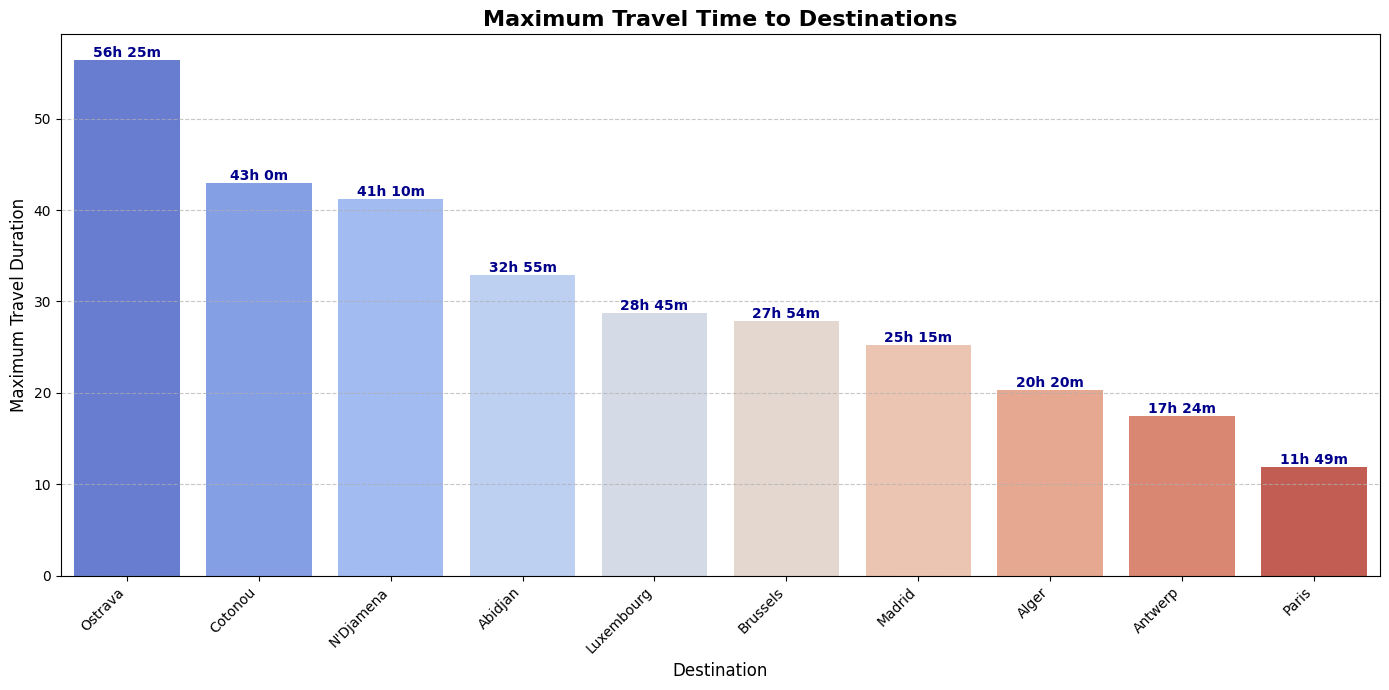

In [55]:
#MAx duration for each destination

def format_duration(hours):
    hour = int(hours)
    mins = int((hours-hour)* 60)
    return f"{hour}h {mins}m"


def get_max_durations(df):
    return df.groupby('Destination')['Duration'].max().sort_values(ascending=False)

max_durations = get_max_durations(df_pandas)

plt.figure(figsize=(14, 7))
bars = sns.barplot(x=max_durations.index, y=max_durations.values, palette='coolwarm')

plt.title('Maximum Travel Time to Destinations', fontsize=16, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Maximum Travel Duration', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, duration in enumerate(max_durations.values):
    formatted_duration = format_duration(duration)
    plt.text(i, duration, formatted_duration, 
             ha='center', va='bottom', 
             fontweight='bold', 
             color='darkblue')

plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Mean Price by Date of Journey')

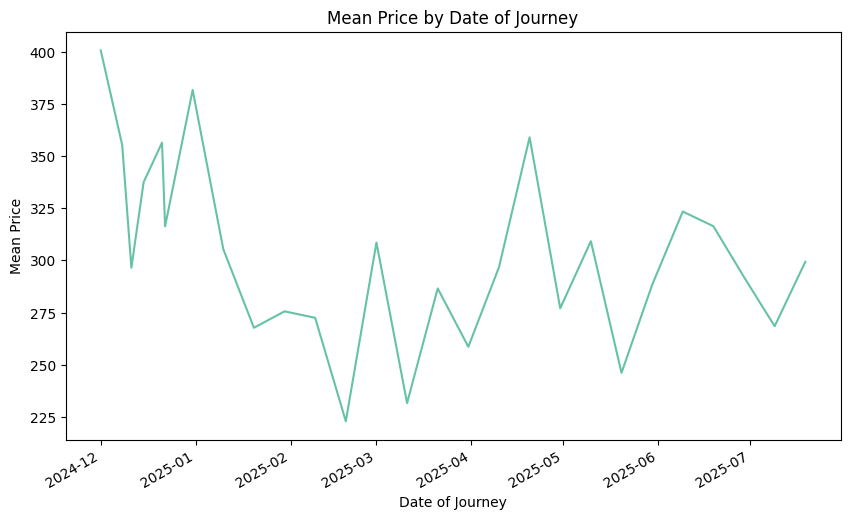

In [56]:
#Means of prices

plt.figure(figsize=(10, 6))

df_pandas["Date"] = pd.to_datetime(df_pandas["Date"])
date_prices = df_pandas.groupby("Date")["Price"].mean()
date_prices.plot()

plt.xlabel("Date of Journey")
plt.ylabel("Mean Price")
plt.title("Mean Price by Date of Journey")

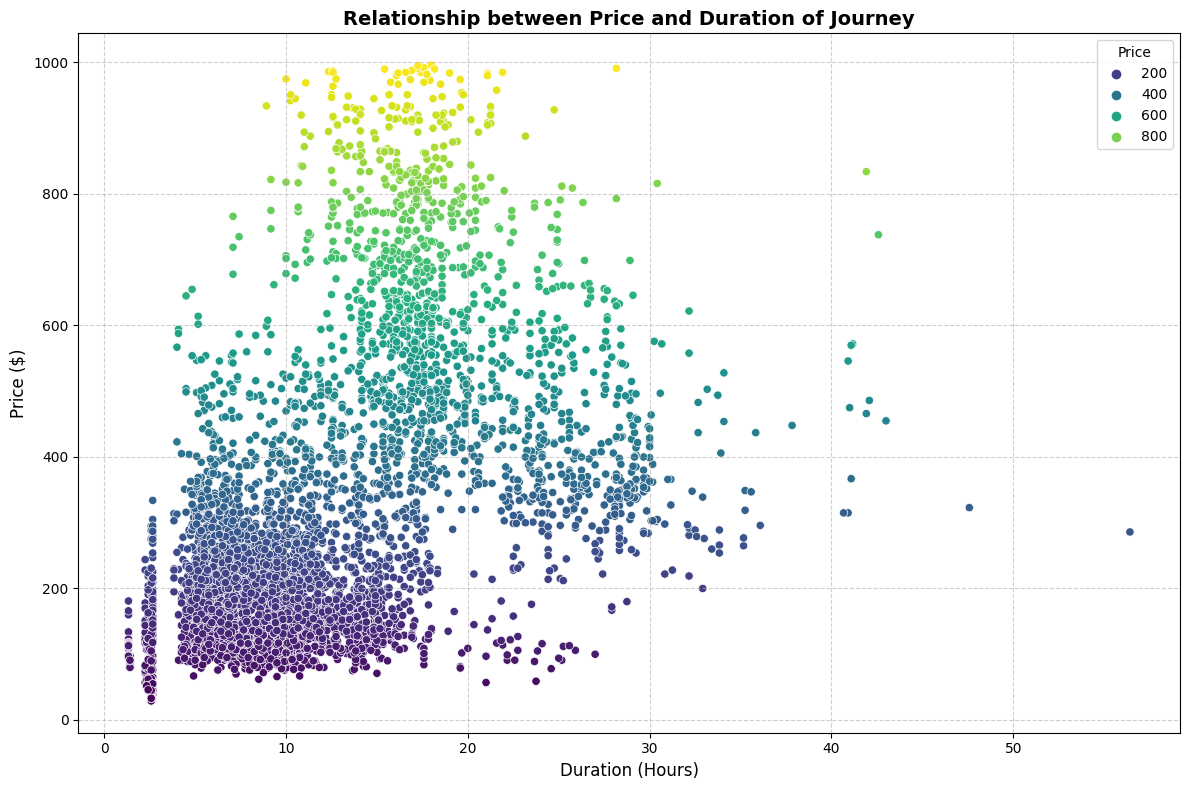

In [57]:
#Relationship between Price and Duration of Hour's

# Création de la figure
plt.figure(figsize=(12, 8))

# Scatterplot amélioré
sns.scatterplot(
    x='Duration', 
    y='Price', 
    data=df_pandas,
    hue='Price',  
    sizes=(20, 200),  
    palette='viridis' 
)


plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Relationship between Price and Duration of Journey', fontsize=14, fontweight='bold')


plt.grid(True, linestyle='--', alpha=0.6)  
plt.tight_layout()

plt.show()


/tmp/ipykernel_2315/107482528.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 4500x2100 with 0 Axes>

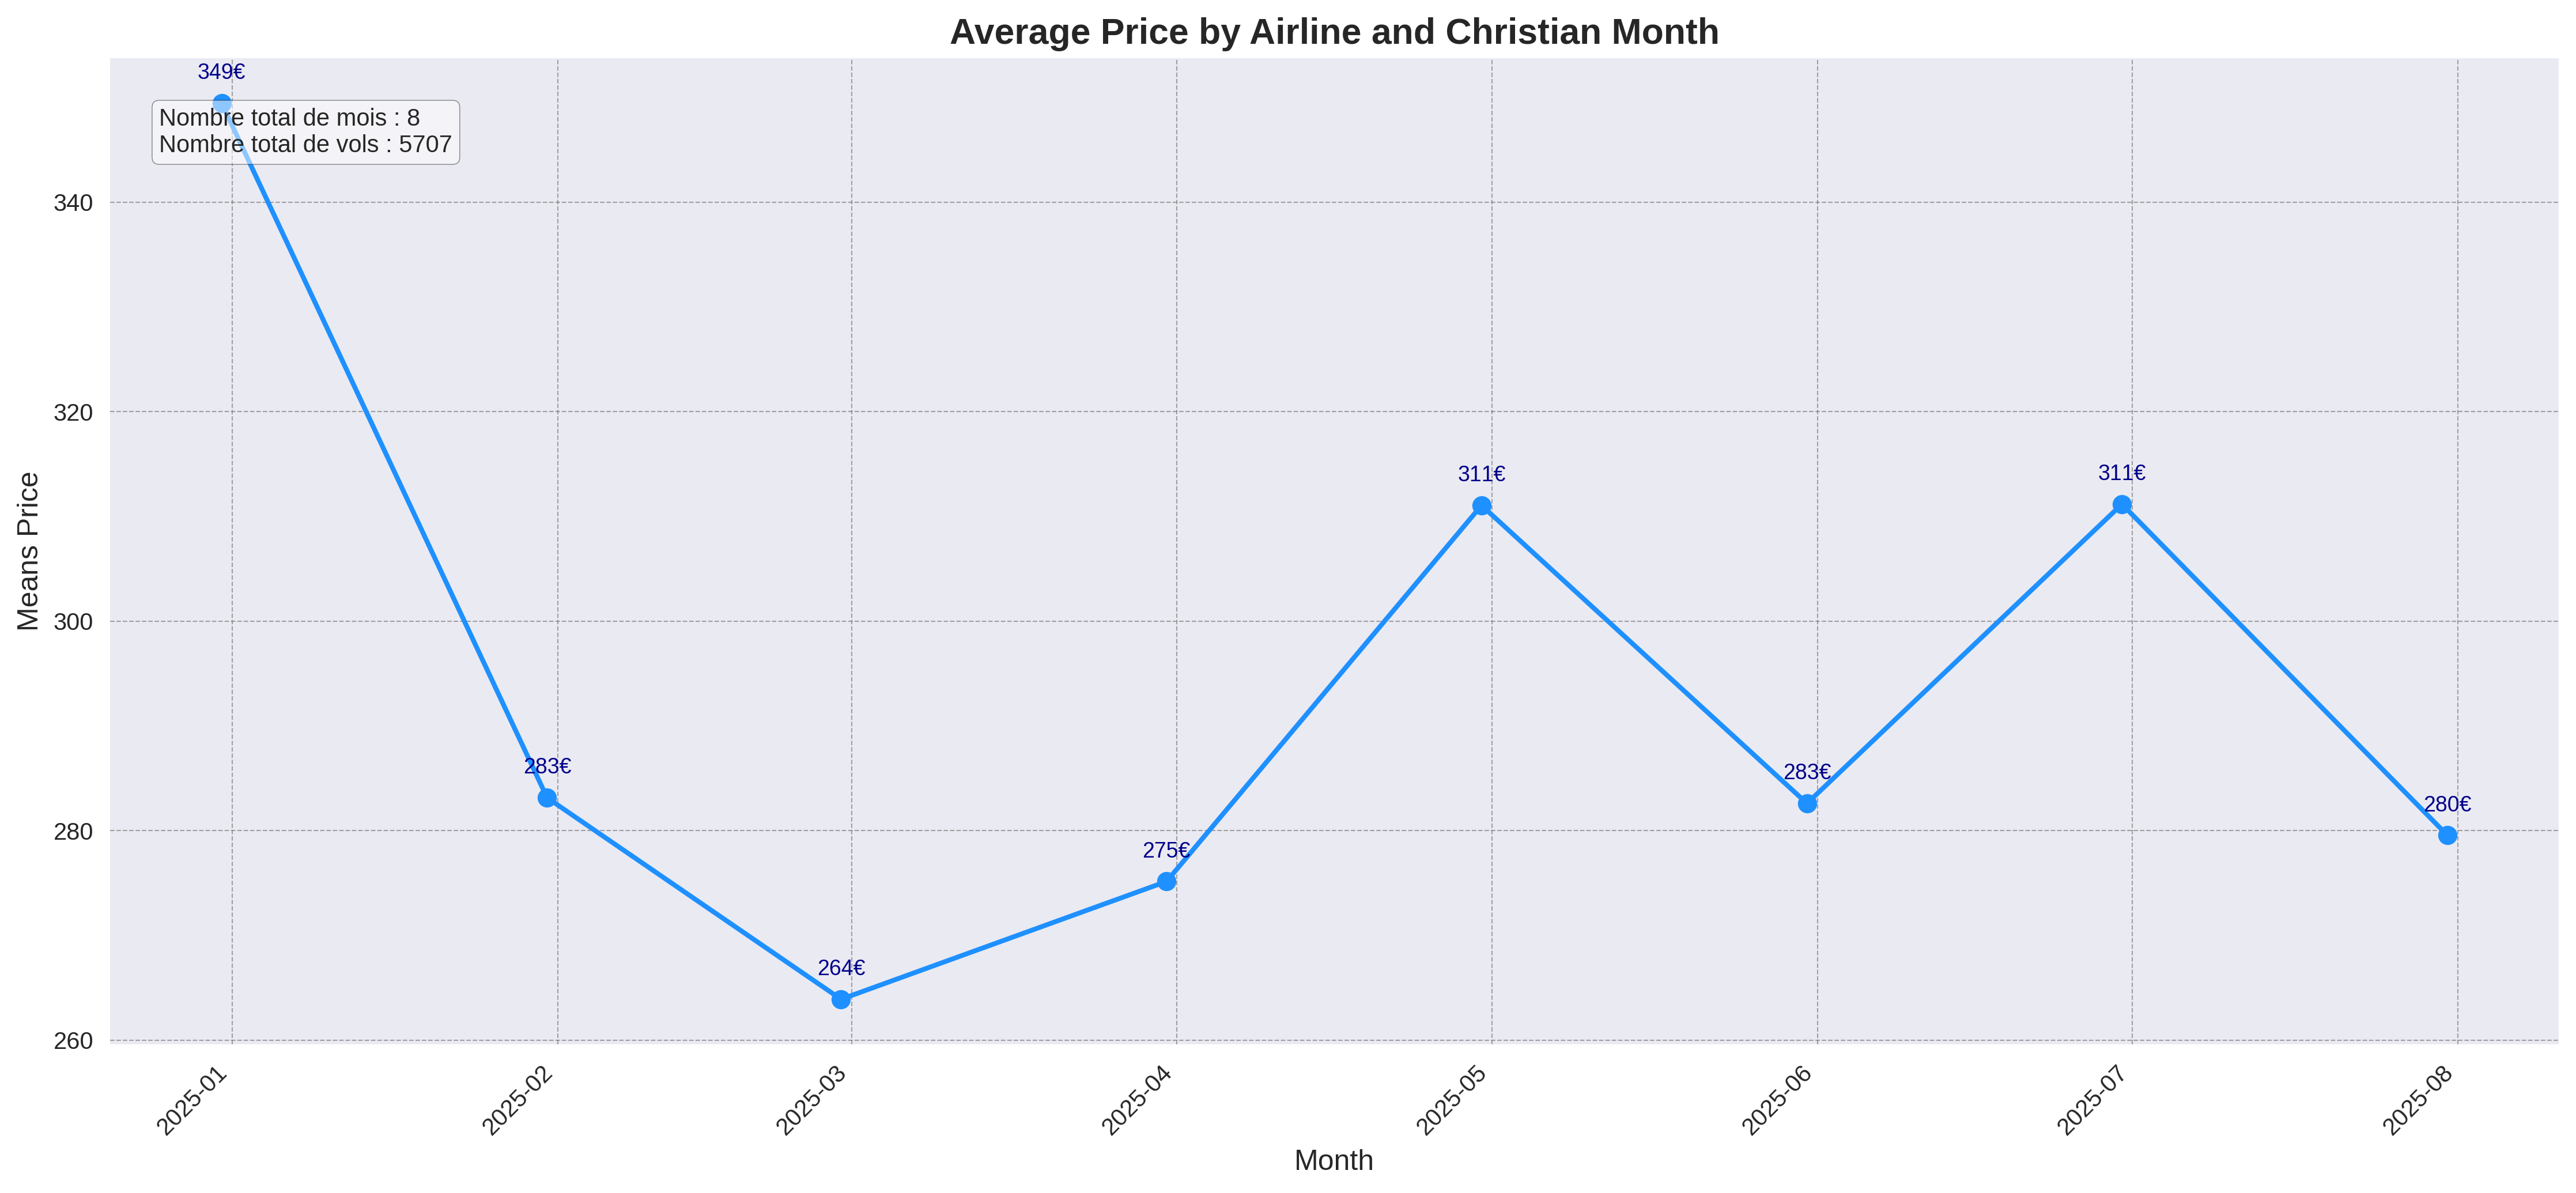

In [58]:
# Average Price by Airline and Christian Month

import matplotlib.dates as mdates


df_pandas["Date"] = pd.to_datetime(df_pandas["Date"], errors='coerce')
df_pandas = df_pandas.dropna(subset=["Date"])


monthly_prices = df_pandas.groupby(pd.Grouper(key="Date", freq="M"))["Price"].agg([
    'mean',     # Prix moyen
    'count'     # Nombre de vols
]).reset_index()


plt.style.use('seaborn')
plt.figure(figsize=(15, 7), dpi=300)


fig, ax = plt.subplots(figsize=(15, 7), dpi=300)


ax.plot(monthly_prices['Date'], monthly_prices['mean'], 
        marker='o', linestyle='-', color='#1E90FF', 
        linewidth=2, markersize=8, label='Prix Moyen Mensuel')


ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Means Price", fontsize=12)
ax.set_title("Average Price by Airline and Christian Month", fontsize=15, fontweight='bold')


plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)


for i, row in monthly_prices.iterrows():
    ax.annotate(f'{row["mean"]:.0f}€', 
                (row['Date'], row['mean']), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                fontsize=9, 
                color='darkblue')

# Informations additionnelles
plt.text(0.02, 0.95, 
         f"Nombre total de mois : {len(monthly_prices)}\n" +
         f"Nombre total de vols : {monthly_prices['count'].sum()}", 
         transform=ax.transAxes, 
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))



plt.tight_layout()
plt.show()

We notice that the months of January, May and July are more expensive, probably because of the higher demand, which corresponds to vacations.